In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('dataset.csv', encoding='latin', delimiter=',')
df.columns = [i for i in range(df.shape[1])]
df

EmptyDataError: No columns to parse from file

In [ ]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.546430,0.645926,-9.459671e-07,0.570585,0.526220,-0.080941,0.550724,0.370352,-0.119717,0.556072,...,0.259778,0.645243,-0.128095,0.211039,0.678338,-0.151644,0.169442,0.697943,-0.158761,call me
1,0.529575,0.642210,-9.145092e-07,0.555960,0.522629,-0.083494,0.536153,0.376865,-0.123810,0.537950,...,0.260612,0.677370,-0.123754,0.219491,0.715005,-0.145073,0.184124,0.737201,-0.151074,call me
2,0.530246,0.648167,-8.461688e-07,0.552681,0.530790,-0.088731,0.525402,0.385809,-0.132104,0.520416,...,0.270473,0.699953,-0.131743,0.240706,0.740948,-0.153816,0.212301,0.766714,-0.158960,call me
3,0.526505,0.648445,-8.316524e-07,0.548537,0.533058,-0.089637,0.518416,0.391406,-0.133617,0.511090,...,0.257624,0.698200,-0.130699,0.225538,0.737787,-0.152932,0.192646,0.763972,-0.157795,call me
4,0.523990,0.647790,-8.621701e-07,0.545243,0.529661,-0.088256,0.516051,0.388929,-0.131547,0.509106,...,0.247575,0.697561,-0.125543,0.213157,0.741170,-0.145288,0.178332,0.770697,-0.147937,call me
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,0.447868,0.856570,-4.793984e-08,0.491456,0.783899,-0.044386,0.513053,0.681575,-0.063228,0.468997,...,0.327399,0.621747,-0.063849,0.359353,0.682058,-0.057800,0.377647,0.725036,-0.039674,Z
3370,0.444372,0.857580,-4.894501e-08,0.489151,0.786670,-0.041353,0.510481,0.685723,-0.058935,0.465714,...,0.323863,0.625411,-0.064789,0.355942,0.684926,-0.057706,0.375973,0.728147,-0.039247,Z
3371,0.443299,0.854912,-3.136665e-08,0.487856,0.783892,-0.044221,0.506693,0.681972,-0.061904,0.461475,...,0.323789,0.619116,-0.061716,0.355612,0.681090,-0.055315,0.375389,0.723416,-0.036955,Z
3372,0.442023,0.852934,-2.032184e-09,0.485756,0.780790,-0.046907,0.502048,0.684345,-0.067859,0.459626,...,0.321464,0.616879,-0.066392,0.352665,0.679248,-0.059990,0.373150,0.720909,-0.041542,Z


In [ ]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (3374, 63)
Labels shape = (3374,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [ ]:
y_pred = svm.predict(x_test)
y_pred

array(['rock', 'P', 'hi', 'bye', 'S', 'C', 'U', 'J', 'J', 'hi', 'G',
       'like', 'T', 'P', 'love', 'J', 'pray', 'home', 'home', 'O', 'C',
       'G', 'pray', 'D', 'T', 'I', 'E', ' call me', 'Q', 'G', 'M', 'D',
       'Z', 'D', 'D', 'Z', 'I', 'A', 'N', 'love', 'N', 'Y', 'bye',
       ' call me', 'N', 'A', 'dislike', 'like', 'W', 'D', 'B', 'L', 'H',
       'W', 'L', 'D', 'E', 'E', 'X', 'pray', 'F', 'O', 'S', 'love', 'B',
       'U', 'H', 'love', 'L', 'S', 'J', 'O', 'V', 'P', 'Z', 'dislike',
       'I', 'X', 'home', 'N', 'J', 'T', 'D', 'P', 'Y', 'D', 'K', 'C', 'M',
       'S', 'H', 'Q', 'A', 'rock', 'hi', 'I', 'U', 'W', 'W', 'T', 'rock',
       'bye', 'W', 'O', 'E', 'dislike', 'D', 'Y', 'X', 'love', 'B',
       'love', ' call me', 'U', 'Y', 'B', 'pray', 'K', 'A', 'M', 'M', 'I',
       'J', 'K', 'P', 'P', 'X', 'B', 'O', 'W', 'Y', 'L', 'M', 'V', 'pray',
       'C', 'G', 'hi', 'L', 'U', 'P', 'V', 'V', 'H', 'F', 'M', 'W', 'R',
       'E', 'N', 'I', 'U', 'bye', 'V', 'X', 'U', 'Z', 'like', '

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9985185185185185, 0.9985185185185185, 0.9985185185185185)

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

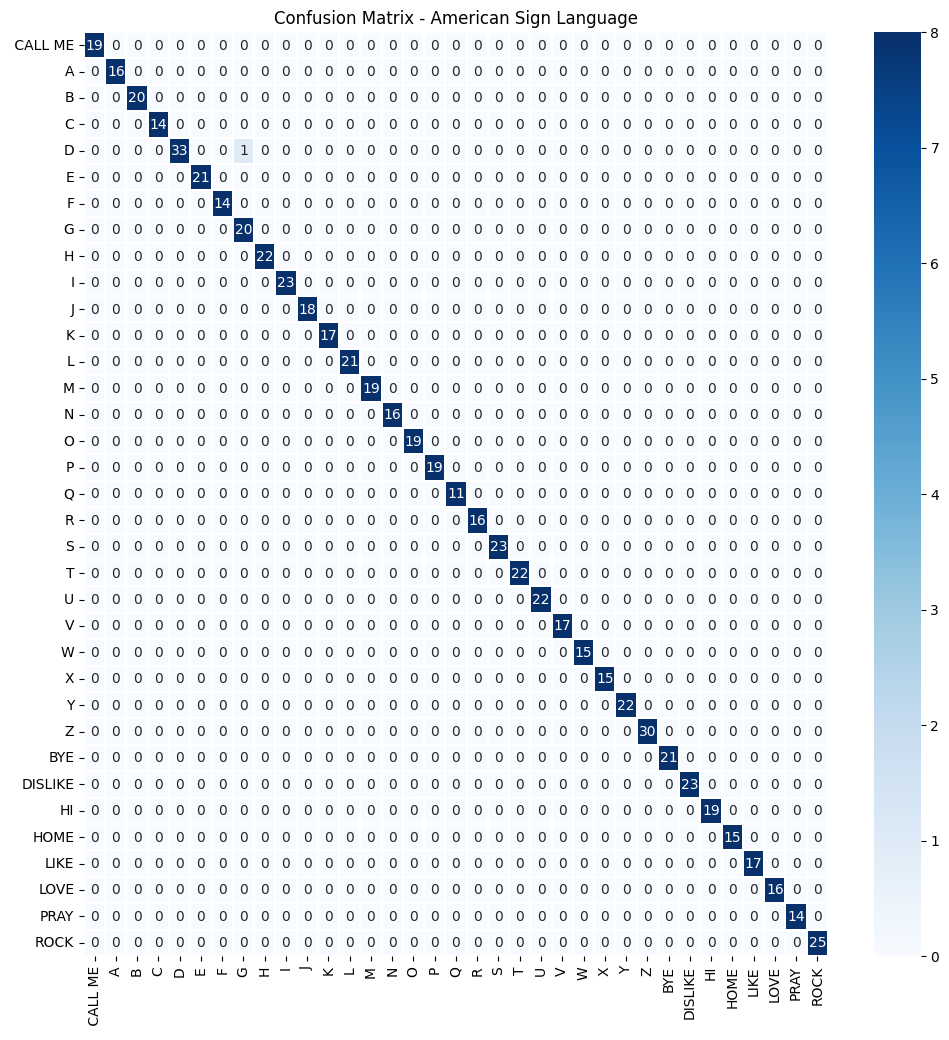

In [ ]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [ ]:
import pickle
# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)